In [74]:
# load yolov3 model and perform object detection
# based on https://github.com/experiencor/keras-yolo3
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

import os
import re
import shutil

In [75]:
#!pip install gdown
def get_folder_path(folder_name, folder_url, colab_drive_path):
    """
    Detect the environment (Colab or local) and handle a folder.
    - In Colab: Use the folder directly from Google Drive.
    - Locally: Check if the folder exists, and download it from Google Drive if missing.
    """
    # Check if running in Colab
    if 'COLAB_GPU' in os.environ:
        print("Running in Google Colab")

        # Mount Google Drive
        from google.colab import drive
        drive.mount('/content/drive')

        # Path to the folder in Google Drive
        drive_folder_path = os.path.join(colab_drive_path, folder_name)

        if os.path.exists(drive_folder_path):
            print(f"Using folder directly from Google Drive: {drive_folder_path}")
            return drive_folder_path
        else:
            raise FileNotFoundError(f"Folder '{folder_name}' not found in Google Drive at {drive_folder_path}. Upload it first.")

    # If running locally (e.g., on KHADAS board)
    else:
        print("Running on local/board")
        local_folder_path = f"./{folder_name}"  # Adjust local folder path as needed

        if not os.path.exists(local_folder_path):
            print(f"Folder '{folder_name}' not found locally. Downloading from Google Drive...")

            # Extract folder ID from the Google Drive folder URL
            match = re.search(r"/folders/([^/]+)", folder_url)
            if not match:
                raise ValueError("Invalid Google Drive folder link format.")
            folder_id = match.group(1)

            # Use gdown to download the folder
            os.system(f"gdown --folder {folder_url} -O {local_folder_path}")

        else:
            print(f"Folder '{folder_name}' already exists locally.")
        return local_folder_path

# Configuration
folder_name = "yolo"
colab_drive_path = "/content/drive/MyDrive/Benchmarking"
folder_url = "https://drive.google.com/drive/folders/1-CvPUnxVet-2U5DOaKrDxa1JPvHmgNnk?usp=sharing"  # Replace with your folder link


# Access the folder
assets_path = get_folder_path(folder_name, folder_url, colab_drive_path)

# Use the folder path
#model_path = os.path.join(assets_path, "Yolov3.h5")
#image_path = os.path.join(assets_path, "Images", "zebra.jpg")

#print(f"Model path: {model_path}")
#print(f"Image path: {image_path}")

Running in Google Colab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using folder directly from Google Drive: /content/drive/MyDrive/Benchmarking/yolo


In [76]:
if False:
    def get_file_path(file_name, file_url, colab_drive_folder):
        """
        Detect the environment (Colab or local) and handle any file dynamically.
        - In Colab: Use the file directly from Google Drive.
        - Locally: Check if the file exists, and download it from Google Drive if missing.
        """
        # Check if running in Colab
        if 'COLAB_GPU' in os.environ:
            print("Running in Google Colab")

            # Mount Google Drive
            from google.colab import drive
            drive.mount('/content/drive')

            # Path to the file in Google Drive
            drive_file_path = os.path.join(colab_drive_folder, file_name)

            if os.path.exists(drive_file_path):
                print(f"Using file directly from Google Drive: {drive_file_path}")
                return drive_file_path
            else:
                raise FileNotFoundError(f"File '{file_name}' not found in Google Drive at {drive_file_path}. Upload it first.")

        # If running locally (e.g., on KHADAS board)
        else:
            print("Running on local/board")
            local_path = os.path.join('./', file_name)  # Adjust local folder path as needed

            if not os.path.exists(local_path):
                print(f"File '{file_name}' not found locally. Downloading from Google Drive...")

                # Extract file ID from the Google Drive file URL
                match = re.search(r"/file/d/([^/]+)/", file_url)
                if not match:
                    raise ValueError("Invalid Google Drive file link format.")
                file_id = match.group(1)
                direct_link = f"https://drive.google.com/uc?id={file_id}&export=download"

                # Download the file
                os.makedirs(os.path.dirname(local_path), exist_ok=True)
                os.system(f"wget -O {local_path} {direct_link}")
                print(f"Downloaded file to: {local_path}")
            else:
                print(f"File '{file_name}' already exists locally.")
            return local_path

    model_file_name = "Yolov3.h5"
    model_file_url = "https://drive.google.com/file/d/1OysAY19cYXJb2dZW-44YN1aMWXxvgWvL/view?usp=sharing"

    image_file_name = "image1.jpg"
    image_file_url = "https://drive.google.com/file/d/1Eker78uyVBv_pnYhAGp1OCaAWfTW5C35/view?usp=sharing"


    colab_drive_folder = "/content/drive/MyDrive/Benchmarking_Assets"
    # Access model file
    model_path = get_file_path(model_file_name, model_file_url, colab_drive_folder)
    print(f"Model path: {model_path}")

    # Access input image
    image_path = get_file_path(image_file_name, image_file_url, colab_drive_folder)
    print(f"Image path: {image_path}")



In [77]:


def get_model_path():
    """
    Detect the environment (Colab or local) and handle the model file.
    - In Colab: Use the file directly from Google Drive.
    - Locally: Check if the file exists, and download it from Google Drive if missing.
    """
    model_filename = "Yolov3.h5"
    model_url = "https://drive.google.com/uc?id=1OysAY19cYXJb2dZW-44YN1aMWXxvgWvL&export=download"  # Replace with your direct download link
    #https://drive.google.com/file/d/1OysAY19cYXJb2dZW-44YN1aMWXxvgWvL/view?usp=sharing


    # Check if running in Colab
    if 'COLAB_GPU' in os.environ:
        print("Running in Google Colab")

        # Mount Google Drive
        from google.colab import drive
        drive.mount('/content/drive')

        # Path to the model in Google Drive
        drive_model_path = "/content/drive/MyDrive/Benchmarking_Models/Yolov3.h5"  # Adjust path if needed

        if os.path.exists(drive_model_path):
            print(f"Using model directly from Google Drive: {drive_model_path}")
            return drive_model_path
        else:
            raise FileNotFoundError(f"Model file not found in Google Drive at {drive_model_path}. Upload it first.")

    # If running locally (e.g., on KHADAS board)
    else:
        print("Running on local/board")
        #local_path = f"/home/khadas/Desktop/working_dir/{model_filename}"  # Adjust as per your local setup
        local_path = f"{model_filename}"  # Adjust as per your local setup

        if not os.path.exists(local_path):
            print(f"Model file '{model_filename}' not found locally. Downloading from Google Drive...")
            os.makedirs(os.path.dirname(local_path), exist_ok=True)
            os.system(f"wget -O {local_path} {model_url}")
        else:
            print(f"Model file '{model_filename}' already exists locally.")
        return local_path


# Load the model
#model_path = get_model_path()
#print(f"Loading model from: {model_path}")
#model = load_model(model_path)


In [78]:
class BoundBox:
	def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
		self.xmin = xmin
		self.ymin = ymin
		self.xmax = xmax
		self.ymax = ymax
		self.objness = objness
		self.classes = classes
		self.label = -1
		self.score = -1

	def get_label(self):
		if self.label == -1:
			self.label = np.argmax(self.classes)

		return self.label

	def get_score(self):
		if self.score == -1:
			self.score = self.classes[self.get_label()]

		return self.score

In [79]:
def _sigmoid(x):
	return 1. / (1. + np.exp(-x))

In [80]:
def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
	grid_h, grid_w = netout.shape[:2]
	nb_box = 3
	netout = netout.reshape((grid_h, grid_w, nb_box, -1))
	nb_class = netout.shape[-1] - 5
	boxes = []
	netout[..., :2]  = _sigmoid(netout[..., :2])
	netout[..., 4:]  = _sigmoid(netout[..., 4:])
	netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
	netout[..., 5:] *= netout[..., 5:] > obj_thresh

	for i in range(grid_h*grid_w):
		row = i / grid_w
		col = i % grid_w
		for b in range(nb_box):
			# 4th element is objectness score
			objectness = netout[int(row)][int(col)][b][4]
			if(objectness.all() <= obj_thresh): continue
			# first 4 elements are x, y, w, and h
			x, y, w, h = netout[int(row)][int(col)][b][:4]
			x = (col + x) / grid_w # center position, unit: image width
			y = (row + y) / grid_h # center position, unit: image height
			w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
			h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height
			# last elements are class probabilities
			classes = netout[int(row)][col][b][5:]
			box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
			boxes.append(box)
	return boxes

In [81]:
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
	new_w, new_h = net_w, net_h
	for i in range(len(boxes)):
		x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
		y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
		boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
		boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
		boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
		boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

In [82]:
def _interval_overlap(interval_a, interval_b):
	x1, x2 = interval_a
	x3, x4 = interval_b
	if x3 < x1:
		if x4 < x1:
			return 0
		else:
			return min(x2,x4) - x1
	else:
		if x2 < x3:
			 return 0
		else:
			return min(x2,x4) - x3

In [83]:
def bbox_iou(box1, box2):
	intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
	intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
	intersect = intersect_w * intersect_h
	w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
	w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
	union = w1*h1 + w2*h2 - intersect
	return float(intersect) / union

In [84]:
def do_nms(boxes, nms_thresh):
	if len(boxes) > 0:
		nb_class = len(boxes[0].classes)
	else:
		return
	for c in range(nb_class):
		sorted_indices = np.argsort([-box.classes[c] for box in boxes])
		for i in range(len(sorted_indices)):
			index_i = sorted_indices[i]
			if boxes[index_i].classes[c] == 0: continue
			for j in range(i+1, len(sorted_indices)):
				index_j = sorted_indices[j]
				if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
					boxes[index_j].classes[c] = 0

In [85]:
# load and prepare an image
def load_image_pixels(filename, shape):
	# load the image to get its shape
	image = load_img(filename)
	width, height = image.size
	# load the image with the required size
	image = load_img(filename, target_size=shape)
	# convert to numpy array
	image = img_to_array(image)
	# scale pixel values to [0, 1]
	image = image.astype('float32')
	image /= 255.0
	# add a dimension so that we have one sample
	image = expand_dims(image, 0)
	return image, width, height

In [86]:
# get all of the results above a threshold
def get_boxes(boxes, labels, thresh):
	v_boxes, v_labels, v_scores = list(), list(), list()
	# enumerate all boxes
	for box in boxes:
		# enumerate all possible labels
		for i in range(len(labels)):
			# check if the threshold for this label is high enough
			if box.classes[i] > thresh:
				v_boxes.append(box)
				v_labels.append(labels[i])
				v_scores.append(box.classes[i]*100)
				# don't break, many labels may trigger for one box
	return v_boxes, v_labels, v_scores

In [87]:
# draw all results
def draw_boxes(filename, v_boxes, v_labels, v_scores):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		print(v_labels[i],x1,y1,x2,y2,v_scores[i])
		# calculate width and height of the box
		width, height = x2 - x1, y2 - y1
		# create the shape
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		# draw the box
		ax.add_patch(rect)
		# draw text and score in top left corner
		label = "%s (%.3f)" % (v_labels[i], v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	# show the plot
	pyplot.show()

In [88]:
# draw all results
def extract_results(v_boxes, v_labels, v_scores):
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		print(v_labels[i],v_scores[i],x1,y1,x2,y2,)

In [89]:
# load yolov3 model #######################

#get model path
#model_path = get_model_path()
# Use the folder path
model_path = os.path.join(assets_path, "Yolov3.h5")

print(f"Loading model from: {model_path}")
model = load_model(model_path)
#############################################



######  input #################################
# define the expected input shape for the model
##input_w, input_h = 416, 416
input_w, input_h = 608, 608

# define our new photo
#image_path = 'zebra.jpg'
image_path = os.path.join(assets_path, "Images", "zebra.jpg")
# load and prepare image
print(f"Image path: {image_path}")
image, image_w, image_h = load_image_pixels(image_path, (input_w, input_h))
###################################################





# make prediction #############################
yhat = model.predict(image)
# summarize the shape of the list of arrays
#print(yhat)
#input()
print([a.shape for a in yhat])
#input()
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
'''
[yolo]
mask = 0,1,2
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
classes=80
num=9
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
'''
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	# decode the output of the network
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)

Loading model from: /content/drive/MyDrive/Benchmarking/yolo/Yolov3.h5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Image path: /content/drive/MyDrive/Benchmarking/yolo/Images/zebra.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[(1, 19, 19, 255), (1, 38, 38, 255), (1, 76, 76, 255)]


In [90]:
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

In [91]:
# suppress non-maximal boxes
do_nms(boxes, 0.5)

In [92]:
# define the labels
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
	"boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
	"bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
	"backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
	"sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
	"tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
	"apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
	"chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
	"remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
	"book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

zebra 99.96983408927917
zebra 99.21296238899231
zebra 99.82313513755798
zebra 41 156 230 420 99.96983408927917
zebra 163 155 439 429 99.21296238899231
zebra 325 189 525 444 99.82313513755798


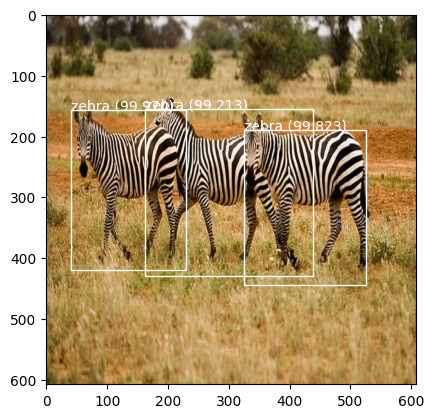

zebra 99.96983408927917 41 156 230 420
zebra 99.21296238899231 163 155 439 429
zebra 99.82313513755798 325 189 525 444


In [93]:
# summarize what we found
for i in range(len(v_boxes)):
	print(v_labels[i], v_scores[i])
# draw what we found
draw_boxes(image_path, v_boxes, v_labels, v_scores)
# detection-results
extract_results(v_boxes, v_labels, v_scores)

In [94]:
def get_yolo_boxes(model, images, net_h, net_w, anchors, obj_thresh, nms_thresh):
    image_h, image_w, _ = images[0].shape
    nb_images           = len(images)
    batch_input         = np.zeros((nb_images, net_h, net_w, 3))

    # preprocess the input
    for i in range(nb_images):
        batch_input[i] = preprocess_input(images[i], net_h, net_w)

    # run the prediction
    batch_output = model.predict_on_batch(batch_input)
    batch_boxes  = [None]*nb_images

    for i in range(nb_images):
        yolos = [batch_output[0][i], batch_output[1][i], batch_output[2][i]]
        boxes = []

        # decode the output of the network
        for j in range(len(yolos)):
            yolo_anchors = anchors[(2-j)*6:(3-j)*6] # config['model']['anchors']
            boxes += decode_netout(yolos[j], yolo_anchors, obj_thresh, net_h, net_w)

        # correct the sizes of the bounding boxes
        correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)

        # suppress non-maximal boxes
        do_nms(boxes, nms_thresh)

        batch_boxes[i] = boxes

    return batch_boxes